<a href="https://colab.research.google.com/github/HazmanNaim/Computer-Vision-Project/blob/main/train-yolov8-object-detection-on-sheep-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training YOLOv8 Object Detection Model on Sheep Dataset

---
Powered by:

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.


## Before we start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Feb  1 03:52:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importing Dataset from Roboflow

The dataset that I am using here is sourced from:
[Link](https://universe.roboflow.com/riis/aerial-sheep)

In [12]:
from google.colab import userdata

In [21]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('RF_TOKEN'))
project = rf.workspace("riis").project("aerial-sheep")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`


Change the `data.yaml`:

```yaml
test: ../test/images
train: ../train/images
val: ../valid/images
```



## Training with our Data

In [23]:
!rm -rf '/content/runs'

Feel free to choose which pretrained model to experiment with. Learn more at: [Link](https://docs.ultralytics.com/models/yolov8/)



| Model   | Size (pixels) | mAPval | Speed (CPU ONNX ms) | Speed (A100 TensorRT ms) | Params (M) | FLOPs (B) |
|---------|---------------|--------|----------------------|--------------------------|------------|-----------|
| YOLOv8n | 640           | 37.3   | 80.4                 | 0.99                     | 3.2        | 8.7       |
| YOLOv8s | 640           | 44.9   | 128.4                | 1.20                     | 11.2       | 28.6      |
| YOLOv8m | 640           | 50.2   | 234.7                | 1.83                     | 25.9       | 78.9      |
| YOLOv8l | 640           | 52.9   | 375.2                | 2.39                     | 43.7       | 165.2     |
| YOLOv8x | 640           | 53.9   | 479.1                | 3.53                     | 68.2       | 257.8     |


In [ ]:
# Choose Model
_model = yolov8s.pt

In [24]:
%cd {HOME}

!yolo task=detect mode=train model=_model data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Aerial-Sheep-1/data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [25]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1706760064.e5be28cb7eef.8089.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3390.jpg  weights
P_curve.png					    train_batch3391.jpg
PR_curve.png					    train_batch3392.jpg


/content


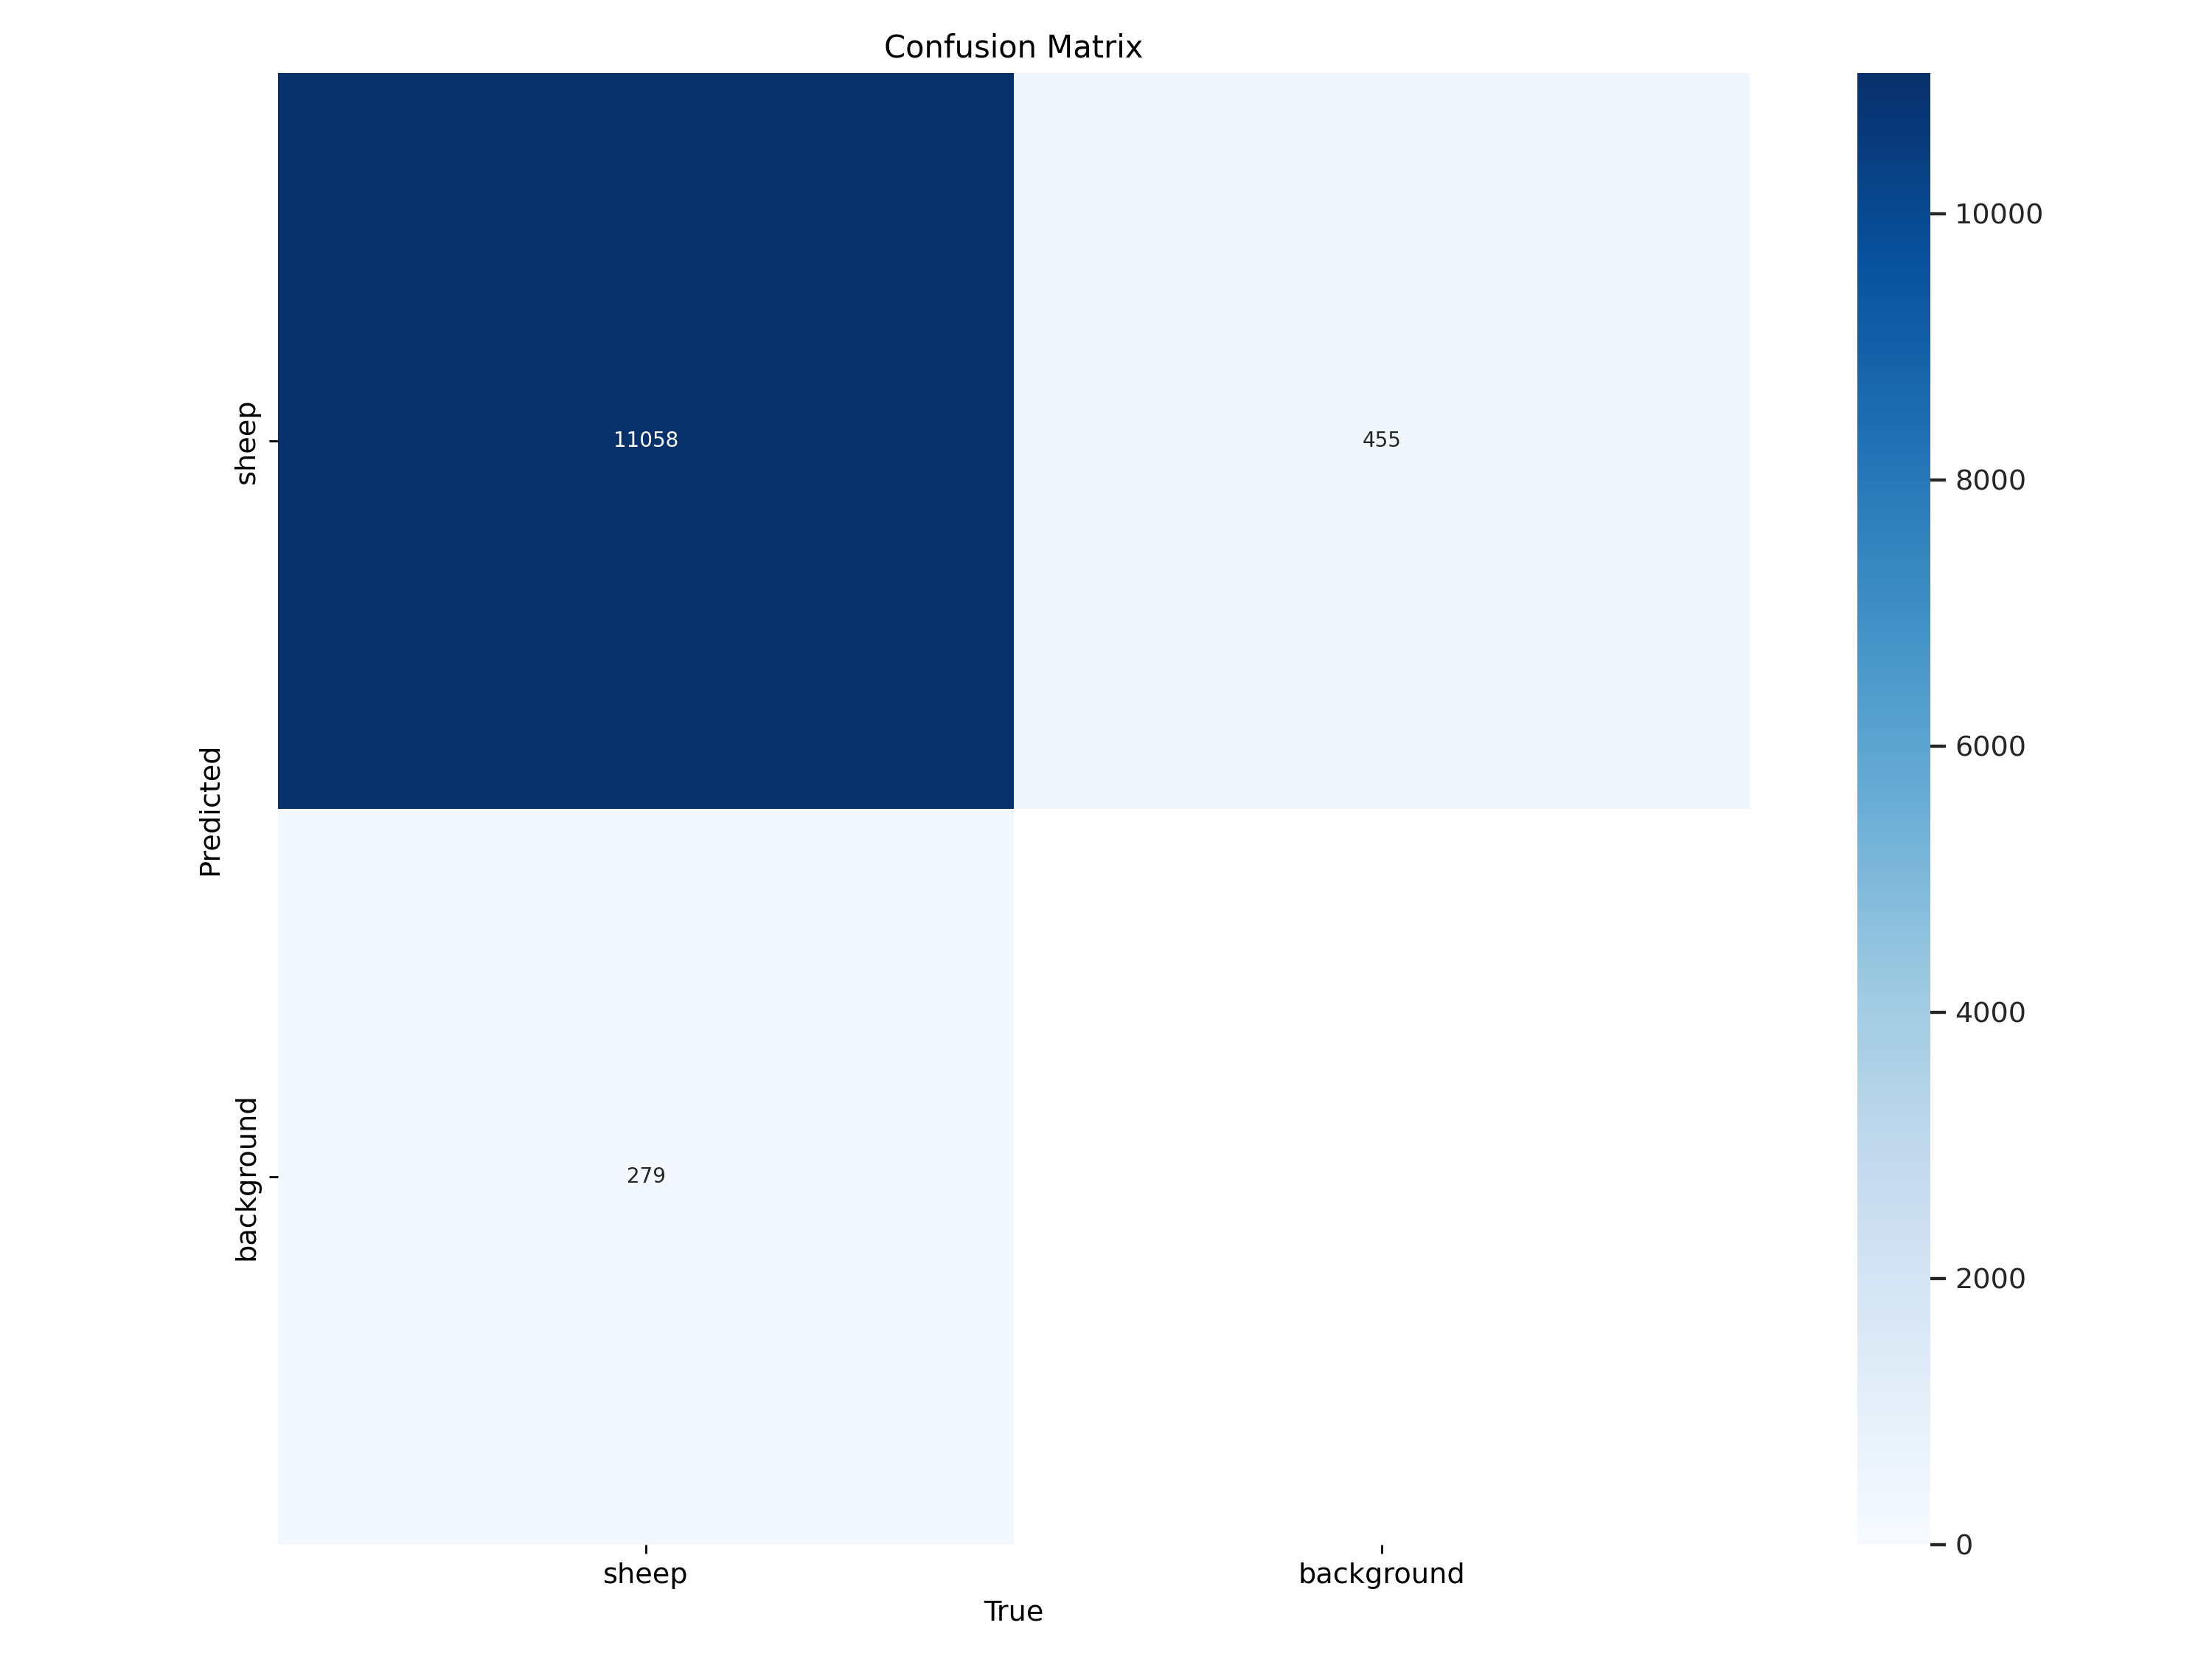

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


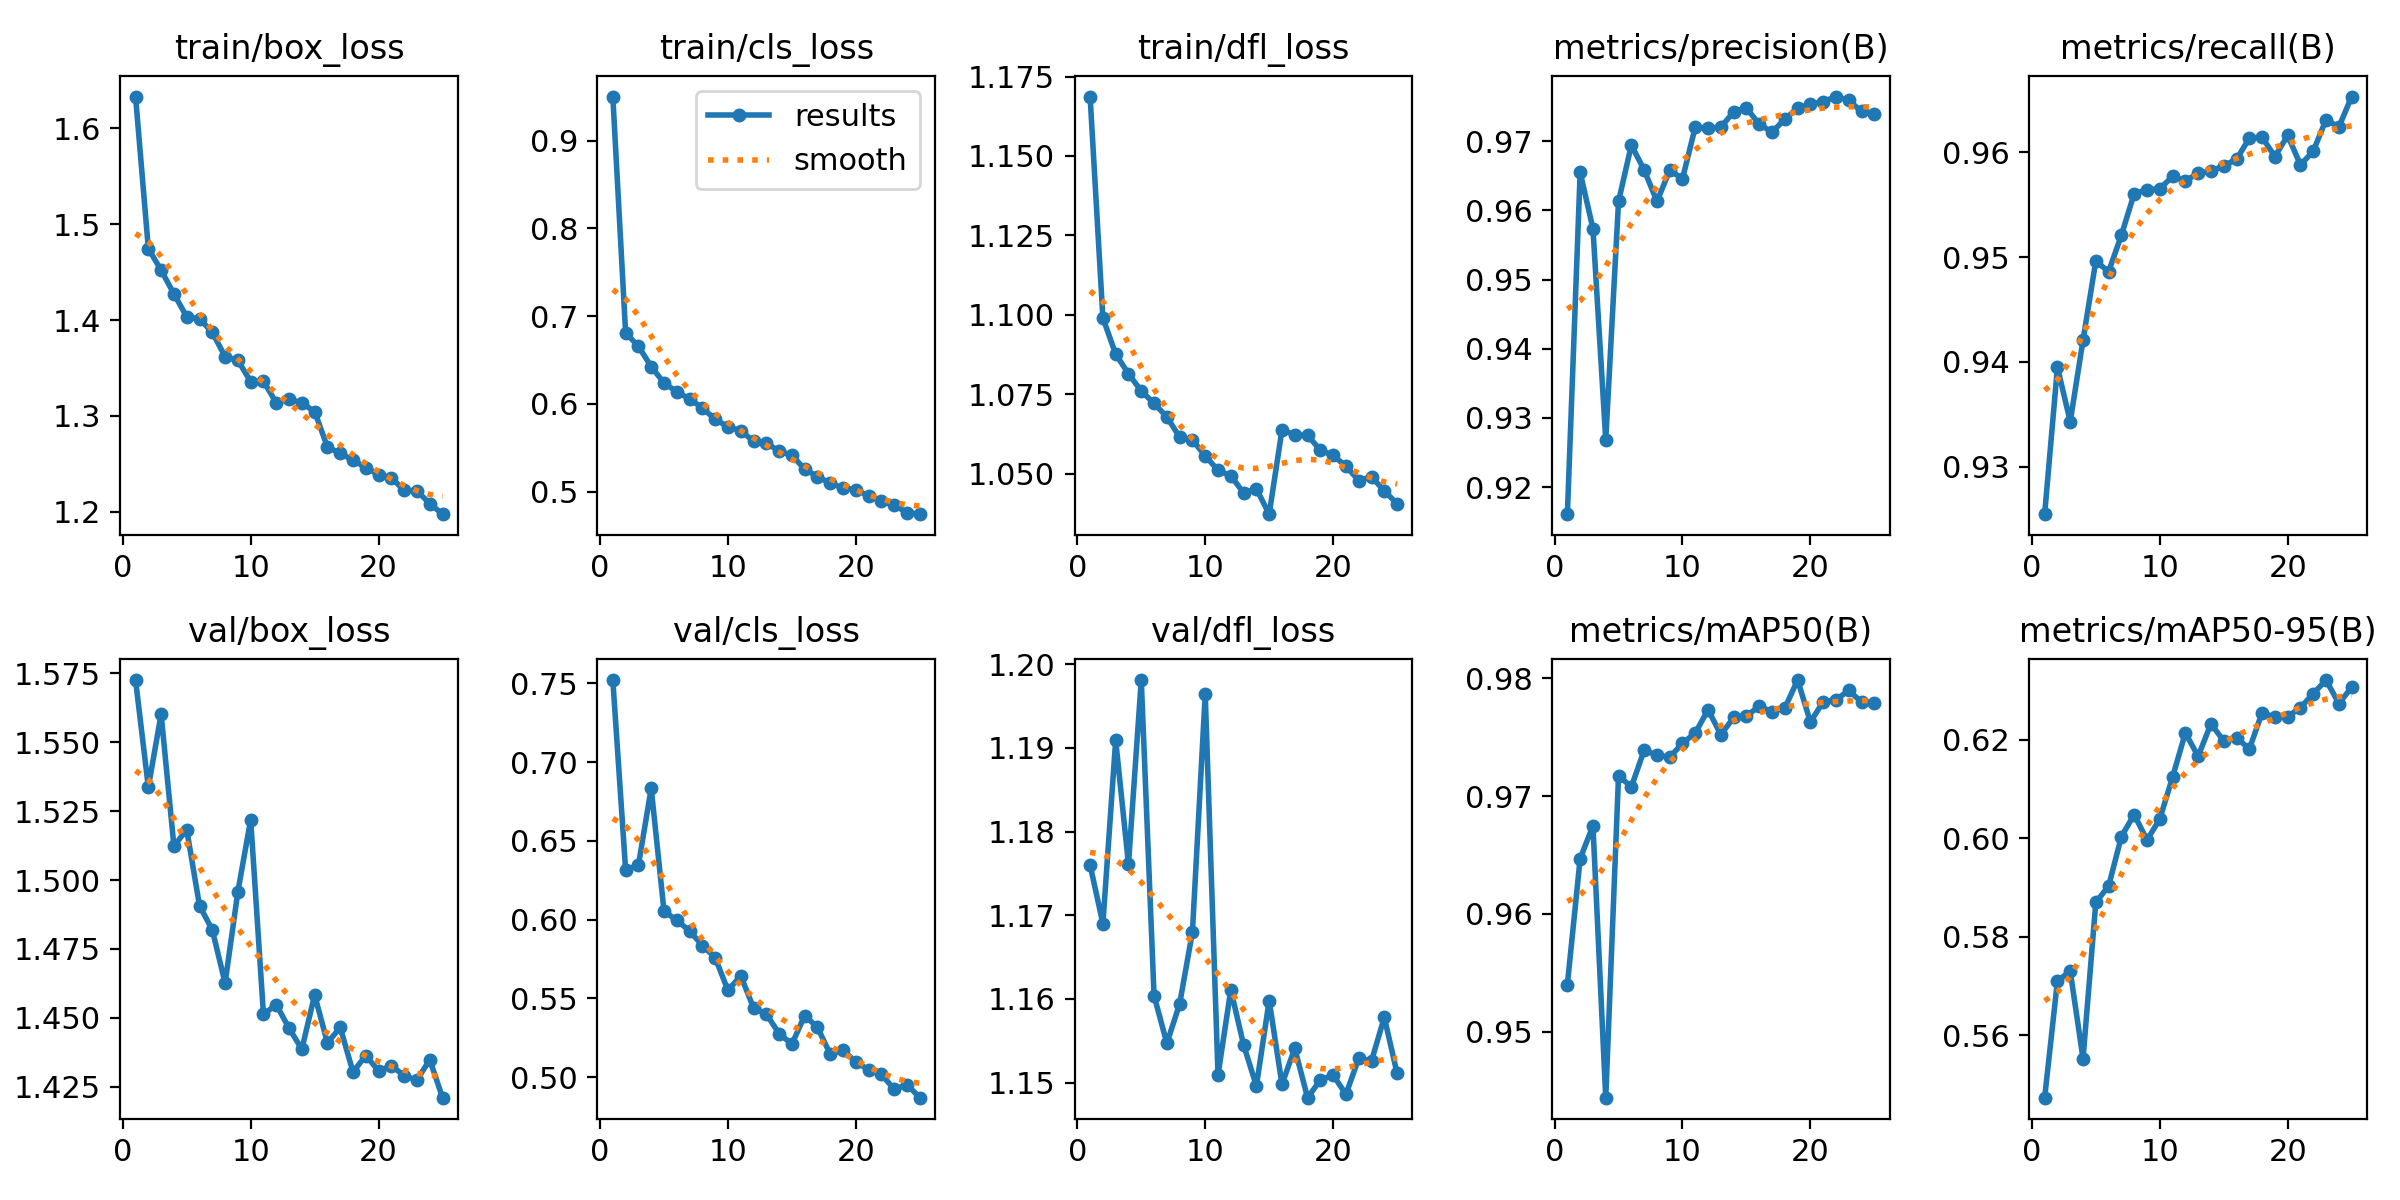

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


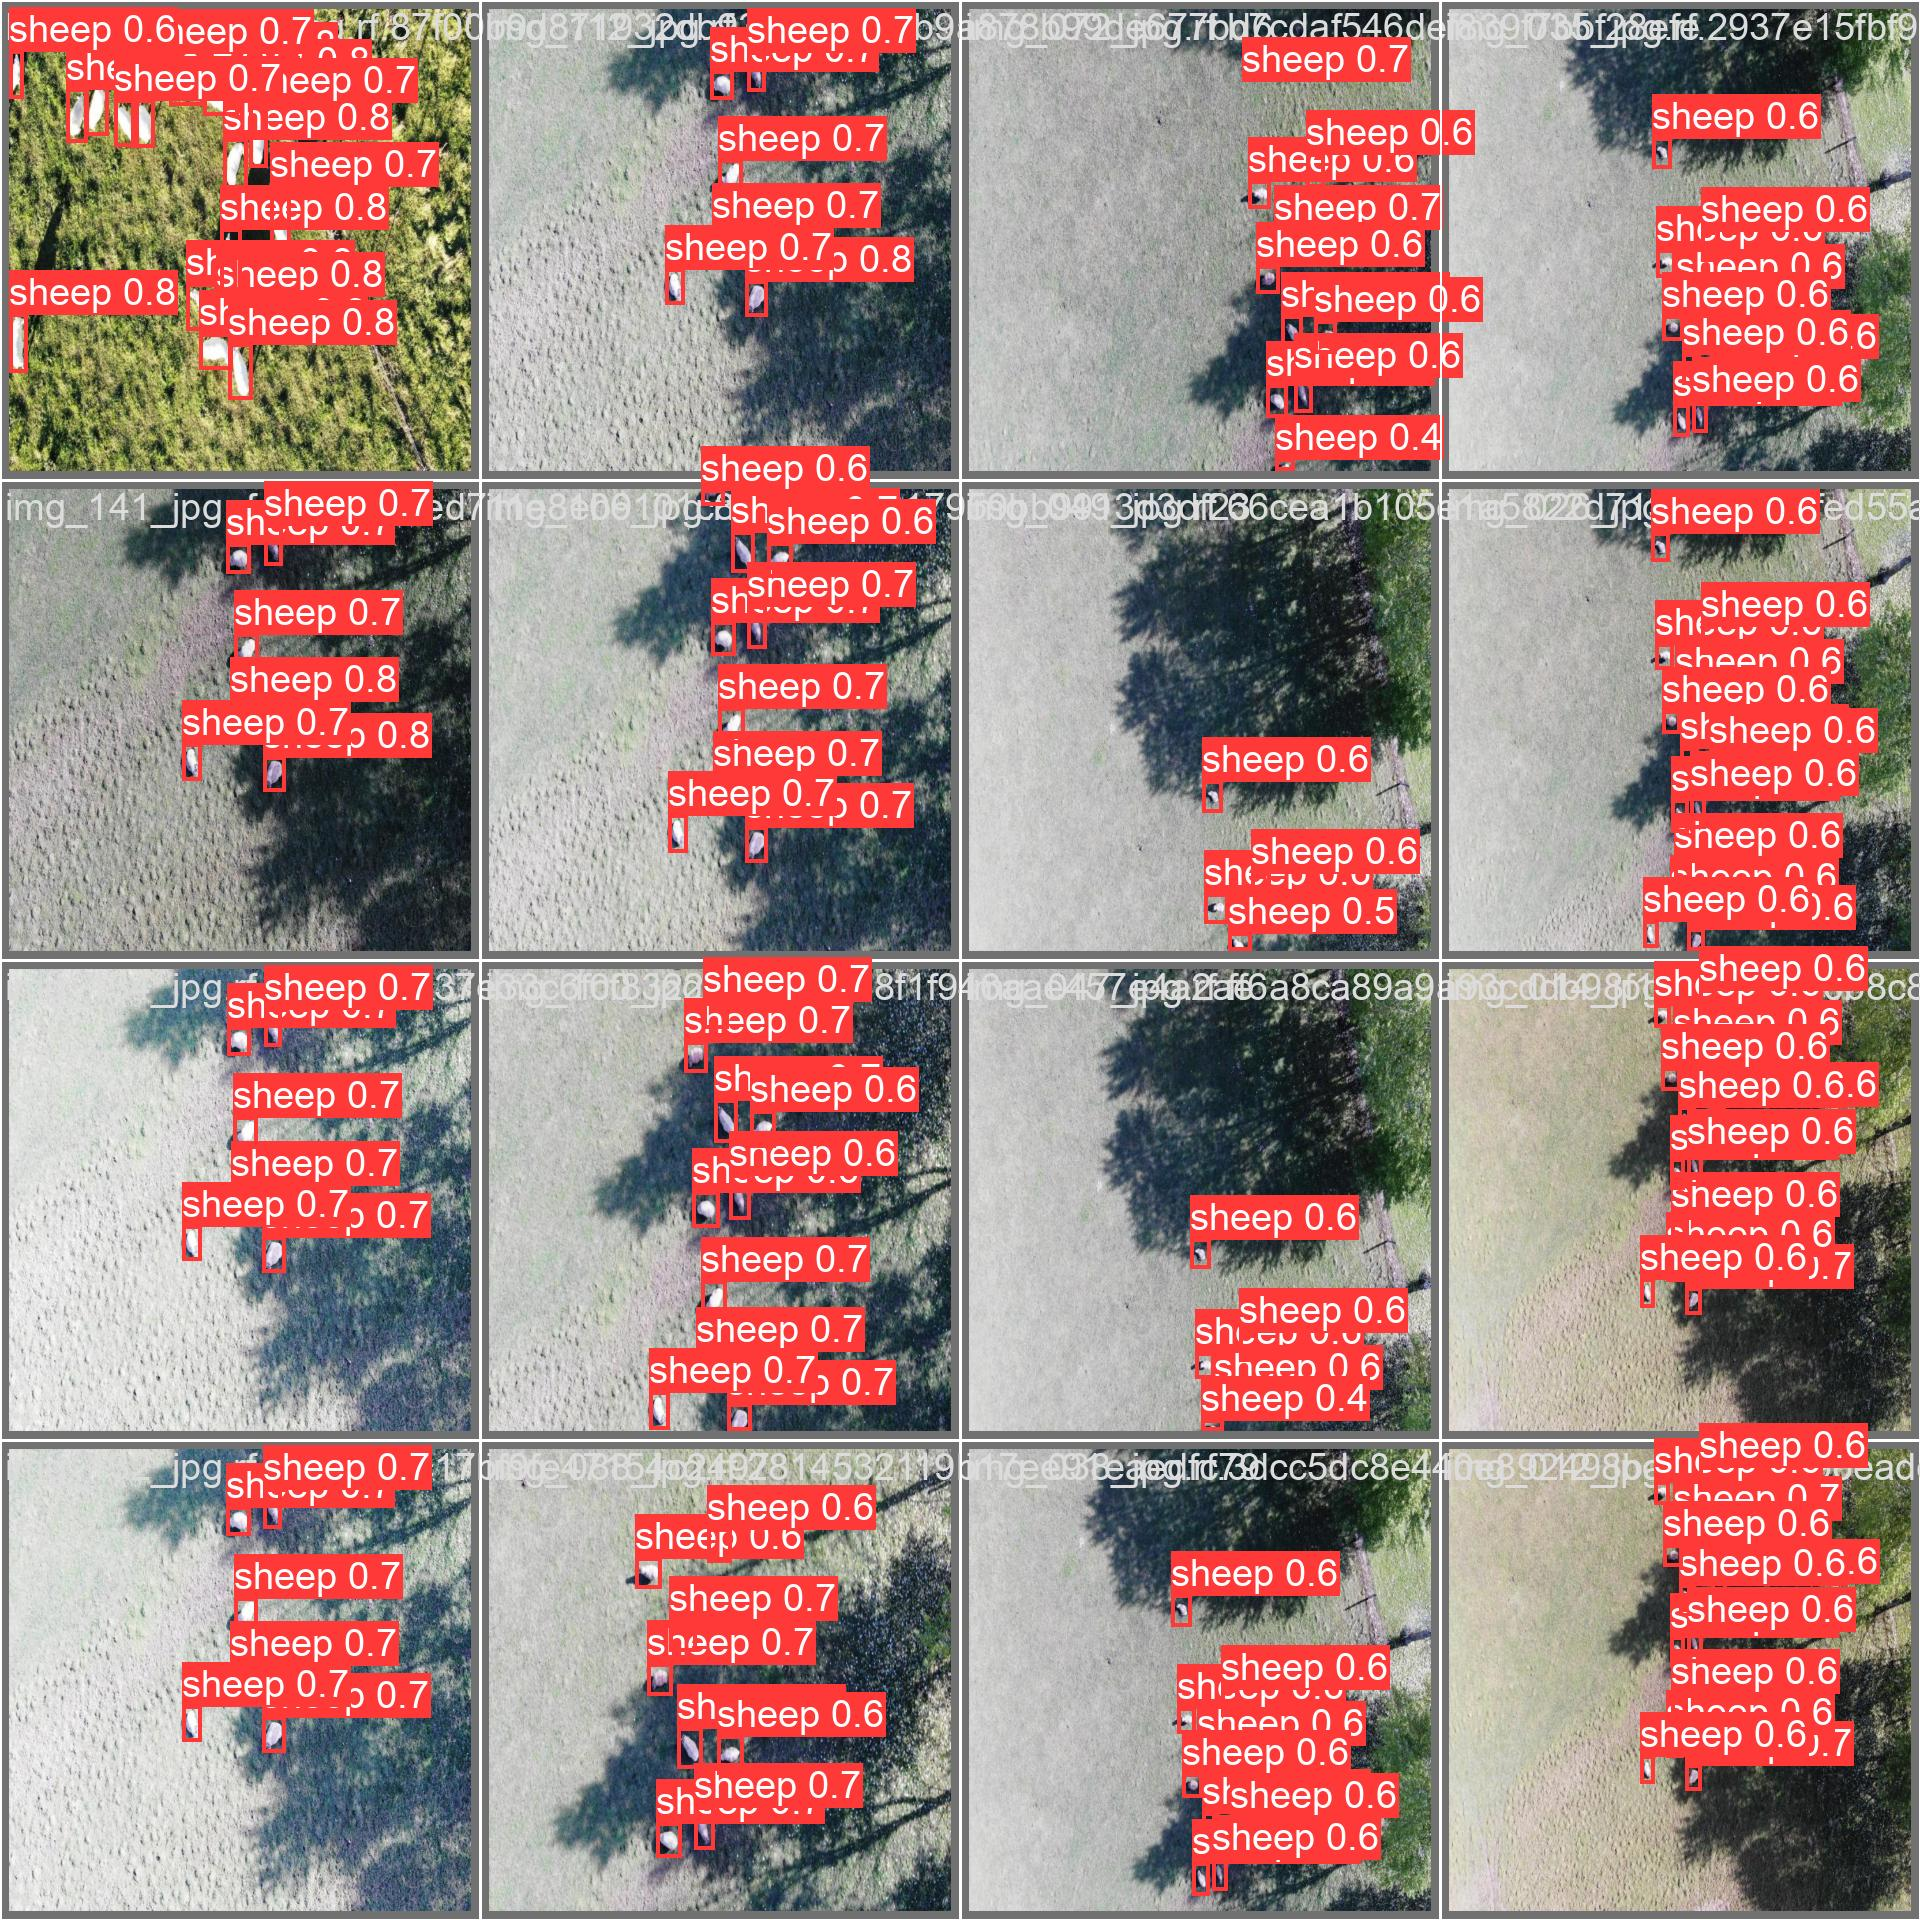

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Aerial-Sheep-1/valid/labels.cache... 350 images, 1 backgrounds, 0 corrupt: 100% 350/350 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:20<00:00,  1.06it/s]
                   all        350      11337      0.975      0.963      0.979      0.634
Speed: 2.6ms preprocess, 15.4ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [30]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0004_0262_jpg.rf.14f93587a02be481b46b466ea33580a9.jpg: 800x800 20 sheeps, 22.5ms
image 2/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0004_0285_jpg.rf.3437cf4895f48307e807216955ab9d02.jpg: 800x800 23 sheeps, 22.5ms
image 3/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0004_0290_jpg.rf.414563acc6568f6a8e9cccbae5ea39e6.jpg: 800x800 13 sheeps, 22.5ms
image 4/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0005_0002_jpg.rf.0a5178c93661aded7723bf47e2e423b4.jpg: 800x800 20 sheeps, 22.4ms
image 5/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0005_0014_jpg.rf.c677eebcf83e27a7404c736c21bef075.jpg: 800x800 22 sheeps, 22.5ms
image 6/174 /content/datasets/Aerial-Sheep-1/test/images/DJI_0005_0017_jpg.rf.097ae294f4779de4c5cfab65c4e04645.jp

**NOTE:** Let's take a look at few results.

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

---

In [36]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Path to the Sample Video

In [83]:
SOURCE_VIDEO_PATH = f"{HOME}/Sample_Video/video3.mp4"

## Install ByteTrack

In [38]:
%cd {HOME}
!git clone https://github.com/HazmanNaim/ByteTrack.git # I am using my own forked repository that I maintain for packages compatibilities
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [39]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

## Install Roboflow Supervision

In [40]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.18.0


In [41]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

## Tracking Utils

In [42]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

## Load Trained Model

In [44]:
# settings
MODEL = f"{HOME}/runs/detect/train/weights/best.pt"

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


In [46]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - sheep
CLASS_ID = [0]

## Predict and Annotate Single Frame


0: 480x800 11 sheeps, 15.8ms
Speed: 4.4ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


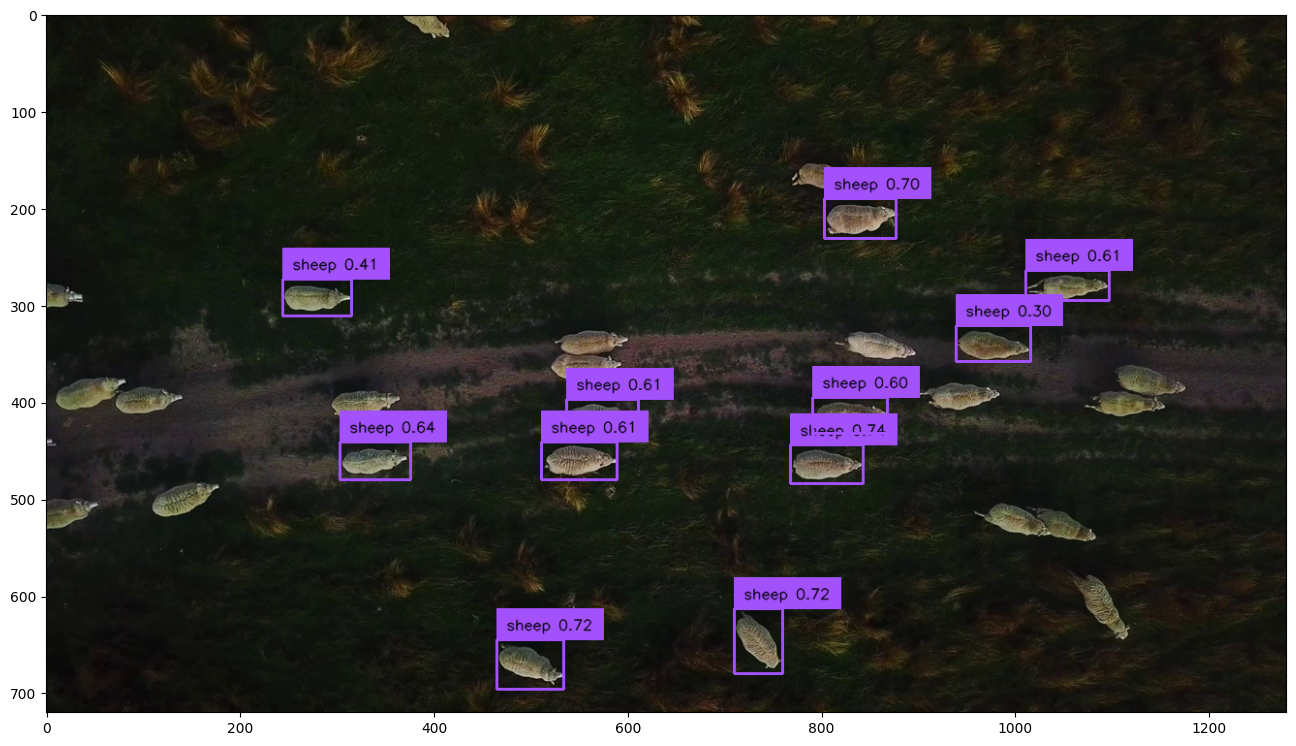

In [84]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette.DEFAULT, thickness=2, text_thickness=1, text_scale=0.5)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)

# filter detections based on confidence
filtered_detections = Detections(
    xyxy=detections.xyxy[detections.confidence > 0.5],
    confidence=detections.confidence[detections.confidence > 0.5],
    class_id=detections.class_id[detections.confidence > 0.5]
)

# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
#frame = box_annotator.annotate(frame=frame, detections=filtered_detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

## Predict and Annotate the Whole Video

In [85]:
TARGET_VIDEO_PATH = f"{HOME}/Output_Video/video3_result.avi"

In [86]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=696)

In [87]:
from tqdm.notebook import tqdm
import cv2

# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette.DEFAULT, thickness=2, text_thickness=1, text_scale=0.5)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # display total tracked items in the upper-left frame
        total_tracked = len(set(detections.tracker_id))
        frame = cv2.putText(frame, f"Total Tracked: {total_tracked}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        sink.write_frame(frame)


  0%|          | 0/696 [00:00<?, ?it/s]


0: 480x800 11 sheeps, 15.7ms
Speed: 5.2ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 13 sheeps, 16.4ms
Speed: 3.7ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 11 sheeps, 15.9ms
Speed: 3.9ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 13 sheeps, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 14 sheeps, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 11 sheeps, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 15 sheeps, 15.7ms
Speed: 3.3ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 12 sheeps, 15.7ms
Speed: 5.1ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (